In [9]:
import pandas as pd
import numpy as np
import requests
import json
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Dúvidas gerais

- Q2:
    - Os retornos deveriam ser acumulados?
    - Como mostrar a diferença das duas medidas da melhor forma?
- Q3:
    - "Cada ação deve ter seus gráficos apresentados como output de uma única célula." se interpretei direito cada ação fica plotada separada, o que seria ruim para comparar as duas, é isso mesmo?
- Q4:
    - Os retornos mensais e trimestrais pega a média mesmo?

# Q1. 
- Usando o  python  (sugerimos o  pacote  yfinance  ou  o  pandas), importe  os  dados  de  preço  de fechamento de 01/11/2017 até 01/01/2022 das ações que compõem o indice IBRX 50. Preencha dados faltantes de cada série com as médias dos vizinhos. Mostre que o DataFrame resultante não temvalores vazios.

## 1.1 Getting the current stocks in IBRX 50

### - 1.1.1 From Infomoney

In [2]:
ibrx50_im_url = 'https://www.infomoney.com.br/cotacoes/b3/indice/ibrx50/'
ibrx50_im = pd.read_html(ibrx50_im_url, decimal=',', thousands='.')[2:]
ibrx50_im = pd.concat(ibrx50_im).reset_index(drop=True)
ibrx50_im

,Ativo,Último (R$),Var. Dia (%),Val. Min (R$),Val. Máx (R$),Data
0,BBAS3,40.57,0.22,40.11,40.81,17:07 07/10
1,BRAP4,25.58,0.20,25.30,26.89,17:07 07/10
2,VBBR3,18.30,0.44,18.17,18.55,16:54 07/10
3,GGBR4,25.54,0.16,25.42,26.20,17:07 07/10
4,VIIA3,3.90,0.00,3.80,3.97,17:07 07/10
5,ITUB4,29.26,0.21,28.65,29.32,17:07 07/10
6,AMER3,20.82,1.34,20.49,21.80,17:07 07/10
7,TOTS3,31.16,0.13,30.69,31.59,17:07 07/10
8,MRFG3,10.42,0.48,10.29,10.69,16:54 07/10
9,PRIO3,31.61,1.27,31.40,32.54,17:07 07/10


In [3]:
# Saving only tickers
stocks_im = ibrx50_im['Ativo'].tolist()
#stocks_im

In [ ]:
#ibrx50_im.to_excel('ibrx50_im.xlsx', index = False)

### Alternative source (Actually the main)
- 1.1.2 From B3

In [107]:
# 
url = 'https://sistemaswebb3-listados.b3.com.br/indexProxy/indexCall/GetPortfolioDay/eyJpbmRleCI6IklCWEwiLCJsYW5ndWFnZSI6InB0LWJyIn0='
r = requests.get(url)
pd.json_normalize(json.loads(r.content))
ibrx50_b3 =  pd.json_normalize(json.loads(r.content), record_path =['results'])
ibrx50_b3.drop(columns=['segment', 'partAcum'], inplace=True) # Not really necessary
ibrx50_b3['part'] = ibrx50_b3['part'].apply(lambda x: float(x.replace(',', '.'))/100) # Also not necessary in this case
ibrx50_b3['theoricalQty'] = ibrx50_b3['theoricalQty'].apply(lambda x: int(x.replace('.', ''))) # Same as above
ibrx50_b3.sort_values(by='part', ascending=False, inplace=True, ignore_index=True)
ibrx50_b3


,cod,asset,type,part,theoricalQty
0,VALE3,VALE,ON NM,0.17741,4547296398
1,PETR4,PETROBRAS,PN N2,0.07934,4566441248
2,ITUB4,ITAUUNIBANCO,PN EJ N1,0.07271,4799907051
3,PETR3,PETROBRAS,ON N2,0.07160,3701760571
4,BBDC4,BRADESCO,PN EJ N1,0.05453,5156077326
5,ELET3,ELETROBRAS,ON N1,0.04744,2021139464
6,B3SA3,B3,ON NM,0.04513,5901731302
7,ABEV3,AMBEV S/A,ON,0.03495,4386652506
8,RENT3,LOCALIZA,ON EJS NM,0.02986,893978241
9,BBAS3,BRASIL,ON NM,0.02985,1420731069


In [ ]:
#ibrx50_b3.to_excel('ibrx50_b3.xlsx', index = False)

In [5]:
# Subsetting only tickers and adding '.SA' to match yfinance format
tickers = [ticker + '.SA' for ticker in ibrx50_b3['cod']]
tickers

['VALE3.SA',
 'PETR4.SA',
 'ITUB4.SA',
 'PETR3.SA',
 'BBDC4.SA',
 'ELET3.SA',
 'B3SA3.SA',
 'ABEV3.SA',
 'RENT3.SA',
 'BBAS3.SA',
 'WEGE3.SA',
 'ITSA4.SA',
 'HAPV3.SA',
 'SUZB3.SA',
 'BPAC11.SA',
 'EQTL3.SA',
 'LREN3.SA',
 'RDOR3.SA',
 'GGBR4.SA',
 'RADL3.SA',
 'JBSS3.SA',
 'PRIO3.SA',
 'RAIL3.SA',
 'VBBR3.SA',
 'CSAN3.SA',
 'BBSE3.SA',
 'TOTS3.SA',
 'MGLU3.SA',
 'BRFS3.SA',
 'ASAI3.SA',
 'CCRO3.SA',
 'ELET6.SA',
 'KLBN11.SA',
 'AMER3.SA',
 'NTCO3.SA',
 'EMBR3.SA',
 'RRRP3.SA',
 'CSNA3.SA',
 'BRML3.SA',
 'BRKM5.SA',
 'MULT3.SA',
 'BRAP4.SA',
 'VIIA3.SA',
 'AZUL4.SA',
 'LWSA3.SA',
 'USIM5.SA',
 'PETZ3.SA',
 'MRFG3.SA',
 'CVCB3.SA',
 'CASH3.SA']

## - 1.2 Importing closing prices from 01/11/2017 to 01/01/2022

In [66]:
# Actually getting closing prices from yfinance
prices = yf.download(tickers, start='2017-11-01', end='2022-01-01', rounding=True)['Adj Close']
prices.columns = [col.rstrip('.SA') for col in prices.columns] # Removing '.SA' from column names
prices


[*********************100%***********************]  50 of 50 completed


,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-01,17.99,21.56,NaN,27.36,6.54,25.64,15.19,18.43,4.48,12.73,...,NaN,17.32,NaN,18.78,10.75,7.21,22.71,NaN,7.3138,7.58
2017-11-02,17.99,21.56,NaN,27.36,6.54,25.64,15.19,18.43,4.48,12.73,...,NaN,17.32,NaN,18.78,10.75,7.21,22.71,NaN,7.3138,7.58
2017-11-03,17.87,20.12,NaN,26.80,6.39,25.18,15.34,18.33,4.37,13.10,...,NaN,17.26,NaN,18.78,10.63,7.10,23.21,NaN,7.3636,7.68
2017-11-06,17.82,19.24,NaN,26.84,6.40,24.98,15.34,18.99,4.35,13.29,...,NaN,17.16,NaN,18.78,10.83,7.54,23.76,NaN,7.3138,7.78
2017-11-07,17.52,17.40,NaN,25.90,6.19,23.73,14.82,18.28,4.35,12.87,...,NaN,18.08,NaN,18.78,11.04,6.88,23.20,NaN,7.2043,7.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,15.55,30.12,13.98,26.46,10.99,27.71,17.13,19.15,21.02,22.72,...,42.19,53.84,31.27,58.59,28.50,14.10,72.46,20.54,4.5000,32.93
2021-12-27,15.53,31.27,13.53,25.67,10.93,27.77,17.32,19.27,21.04,23.32,...,44.23,54.13,31.77,58.74,28.57,14.27,72.28,20.81,4.8600,32.64
2021-12-28,15.52,30.42,12.99,25.75,10.78,27.61,17.26,19.31,20.30,23.18,...,45.34,52.66,32.07,58.08,28.09,13.99,70.54,20.96,4.9500,32.75


In [7]:
# MAIORES DADOS FALTANTES - Naturalmente são as ações que não haviam capital aberto em todo período
prices.isna().sum().sort_values(ascending=False)

ASAI3     823
RDOR3     776
RRRP3     755
CASH3     751
PETZ3     714
LWSA3     563
NTCO3     531
HAPV3     123
VBBR3      93
PRIO3       1
MGLU3       1
MRFG3       1
MULT3       1
PETR3       1
PETR4       1
ABEV3       1
RADL3       1
KLBN11      1
RAIL3       1
RENT3       1
SUZB3       1
TOTS3       1
USIM5       1
VALE3       1
VIIA3       1
LREN3       1
ITUB4       1
JBSS3       1
BRML3       1
AZUL4       1
B3SA3       1
BBAS3       1
BBDC4       1
BBSE3       1
BPAC11      1
BRAP4       1
BRFS3       1
BRKM5       1
CCRO3       1
AMER3       1
CSAN3       1
CSNA3       1
CVCB3       1
ELET3       1
ELET6       1
EMBR3       1
EQTL3       1
GGBR4       1
ITSA4       1
WEGE3       1
dtype: int64

<AxesSubplot:>

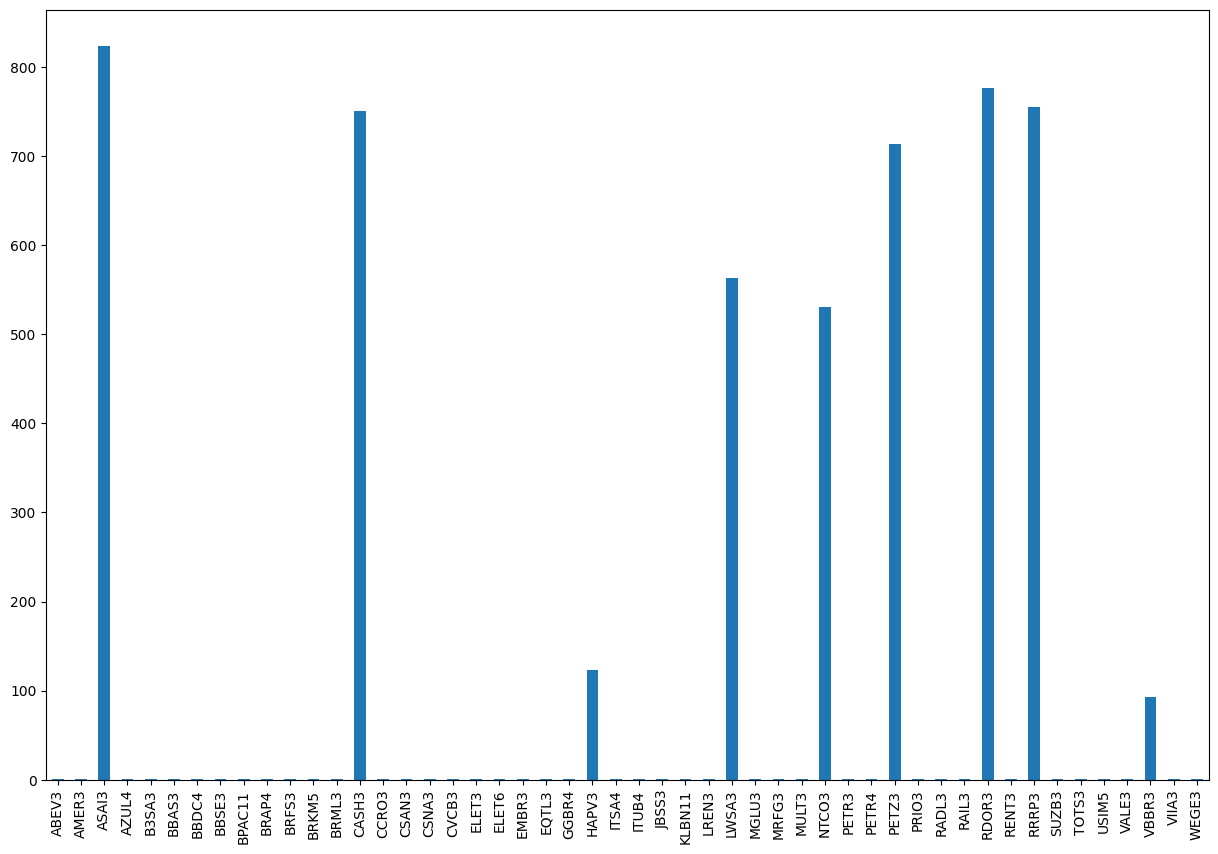

In [8]:
# Visualizando
plt.figure(figsize=(15, 10))
prices.isna().sum().plot(kind='bar')

## - 1.3 Filling na values with the mean of the neighbors

In [10]:
# Com list comprehension - perde um pouco de legibilidade
# Copiei para outro dataframe para não alterar o original, mas poderia ser mais simples
prices_filled = pd.DataFrame([prices.loc[:, col].fillna(prices.loc[:, col].mean()) for col in prices.columns]).T
prices_filled

,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-01,17.99,21.56,16.212333,27.36,6.54,25.64,15.19,18.43,4.48,12.73,...,64.026654,17.32,37.056511,18.78,10.75,7.21,22.71,19.807447,7.3138,7.58
2017-11-02,17.99,21.56,16.212333,27.36,6.54,25.64,15.19,18.43,4.48,12.73,...,64.026654,17.32,37.056511,18.78,10.75,7.21,22.71,19.807447,7.3138,7.58
2017-11-03,17.87,20.12,16.212333,26.80,6.39,25.18,15.34,18.33,4.37,13.10,...,64.026654,17.26,37.056511,18.78,10.63,7.10,23.21,19.807447,7.3636,7.68
2017-11-06,17.82,19.24,16.212333,26.84,6.40,24.98,15.34,18.99,4.35,13.29,...,64.026654,17.16,37.056511,18.78,10.83,7.54,23.76,19.807447,7.3138,7.78
2017-11-07,17.52,17.40,16.212333,25.90,6.19,23.73,14.82,18.28,4.35,12.87,...,64.026654,18.08,37.056511,18.78,11.04,6.88,23.20,19.807447,7.2043,7.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,15.55,30.12,13.980000,26.46,10.99,27.71,17.13,19.15,21.02,22.72,...,42.190000,53.84,31.270000,58.59,28.50,14.10,72.46,20.540000,4.5000,32.93
2021-12-27,15.53,31.27,13.530000,25.67,10.93,27.77,17.32,19.27,21.04,23.32,...,44.230000,54.13,31.770000,58.74,28.57,14.27,72.28,20.810000,4.8600,32.64
2021-12-28,15.52,30.42,12.990000,25.75,10.78,27.61,17.26,19.31,20.30,23.18,...,45.340000,52.66,32.070000,58.08,28.09,13.99,70.54,20.960000,4.9500,32.75


In [ ]:
# Com for loop, bem intuitivo (pra mim), e quase a mesma coisa do anterior
# Rodar esse ou o de cima, escolhi o método de list comprehension e armazenar em outa variável

'''
for col in prices.columns:
    prices.loc[:, col].fillna(prices.loc[:, col].mean(), inplace=True)
'''

## - 1.4 Visualizing treated na values


In [11]:
prices_filled.isna().sum().sort_values(ascending=False)

ABEV3     0
PRIO3     0
KLBN11    0
LREN3     0
LWSA3     0
MGLU3     0
MRFG3     0
MULT3     0
NTCO3     0
PETR3     0
PETR4     0
PETZ3     0
RADL3     0
AMER3     0
RAIL3     0
RDOR3     0
RENT3     0
RRRP3     0
SUZB3     0
TOTS3     0
USIM5     0
VALE3     0
VBBR3     0
VIIA3     0
JBSS3     0
ITUB4     0
ITSA4     0
HAPV3     0
ASAI3     0
AZUL4     0
B3SA3     0
BBAS3     0
BBDC4     0
BBSE3     0
BPAC11    0
BRAP4     0
BRFS3     0
BRKM5     0
BRML3     0
CASH3     0
CCRO3     0
CSAN3     0
CSNA3     0
CVCB3     0
ELET3     0
ELET6     0
EMBR3     0
EQTL3     0
GGBR4     0
WEGE3     0
dtype: int64

<AxesSubplot:>

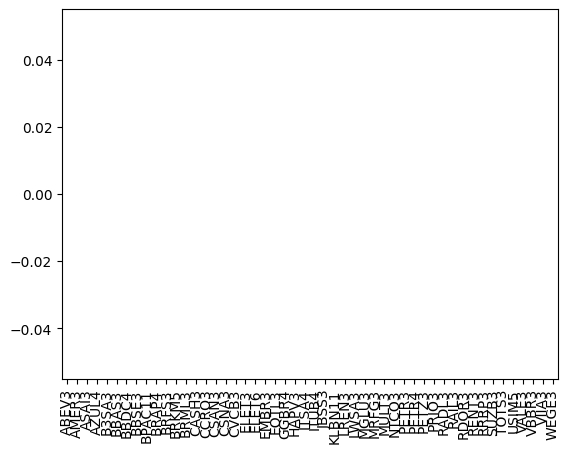

In [12]:
# Visualizando
prices_filled.isna().sum().plot(kind='bar')


# Q2. 
- Em uma célula mostre os últimos 12 dias de preços, ordenados do mais recente para o mais antigo. Nas 2 células seguintes mostre os retornos diários para os mesmos dias, na primeira calculados usando diferença de logaritmos e na segunda a diferença percentual. Mostre a diferença das duas medidas.

## - 2.1 Last 12 days from newest to oldest

In [13]:
# I didn't keep the change in the code, just showing the result
last12 = prices_filled.tail(15)
last12.sort_values(by='Date', ascending=False)

,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,15.42,30.96,12.86,24.36,10.76,27.36,17.10,19.27,20.54,23.64,...,44.34,52.12,33.55,58.52,28.54,14.38,71.37,20.90,5.25,32.45
2021-12-29,15.45,30.41,12.74,23.86,10.70,27.46,17.18,19.20,20.31,23.17,...,43.86,51.23,33.48,57.47,27.79,14.04,70.72,20.60,5.02,32.21
2021-12-28,15.52,30.42,12.99,25.75,10.78,27.61,17.26,19.31,20.30,23.18,...,45.34,52.66,32.07,58.08,28.09,13.99,70.54,20.96,4.95,32.75
2021-12-27,15.53,31.27,13.53,25.67,10.93,27.77,17.32,19.27,21.04,23.32,...,44.23,54.13,31.77,58.74,28.57,14.27,72.28,20.81,4.86,32.64
2021-12-23,15.55,30.12,13.98,26.46,10.99,27.71,17.13,19.15,21.02,22.72,...,42.19,53.84,31.27,58.59,28.50,14.10,72.46,20.54,4.50,32.93
2021-12-22,15.39,30.02,14.05,26.80,11.11,27.81,17.07,19.05,21.33,22.55,...,42.28,54.71,31.48,58.05,29.03,14.14,73.17,20.76,4.50,33.13
2021-12-21,15.40,30.19,14.14,26.44,10.98,27.98,16.99,19.06,20.97,22.30,...,44.82,54.97,30.84,58.40,28.88,14.35,73.55,20.85,4.61,33.37
2021-12-20,15.42,30.48,13.99,24.51,11.33,27.90,17.07,18.93,21.18,21.13,...,44.70,55.07,30.30,58.30,28.93,13.92,71.67,21.02,4.74,33.46
2021-12-17,15.47,30.70,14.34,25.42,11.74,28.76,17.43,19.08,22.13,21.89,...,45.37,55.69,32.30,59.88,29.45,14.74,72.48,21.58,4.85,34.26


In [14]:
# Retorno Logarítmico - Confirmar fórmula
log_return = np.log(last12/ last12.shift(1))
log_return


,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-10,0.008505,0.018787,0.023118,-0.007315,0.055715,0.014791,-0.003931,0.002038,0.059073,0.003358,...,0.030312,0.026042,0.010900,0.010237,0.024630,0.017700,0.006228,0.024648,0.022141,-0.019418
2021-12-13,0.003901,-0.046145,-0.012544,-0.035395,-0.018804,-0.008190,-0.018745,-0.012804,0.006752,0.028331,...,-0.025747,0.009304,0.004262,-0.013435,-0.009402,0.011859,0.028748,0.004947,-0.031513,-0.005700
2021-12-14,0.009687,-0.020448,0.001402,0.008768,-0.004323,0.000000,0.015363,-0.005686,-0.044493,-0.001398,...,-0.033680,0.004620,-0.028872,0.002311,-0.035575,-0.005563,-0.000140,-0.019022,-0.068186,-0.008611
2021-12-15,-0.005155,0.072303,0.020105,0.011050,-0.003472,-0.017253,0.000000,0.012365,0.027298,-0.007957,...,-0.008600,0.030723,-0.006757,0.015504,0.028624,0.009025,-0.005628,0.004562,0.047253,0.008897
2021-12-16,0.001291,0.085557,-0.010348,-0.025036,0.000869,-0.003017,0.012346,-0.004619,-0.008249,0.022306,...,-0.020507,0.007365,0.070980,0.026056,-0.047064,0.031965,0.038341,0.000455,-0.057385,-0.000286
2021-12-17,-0.001937,0.002936,-0.005563,0.022679,0.019786,-0.035187,-0.028282,-0.018692,0.018240,0.005956,...,0.000000,-0.050934,0.019697,0.019732,-0.021499,-0.013477,-0.015878,-0.018366,-0.012295,-0.021084
2021-12-20,-0.003237,-0.007192,-0.024710,-0.036455,-0.035548,-0.030359,-0.020870,-0.007893,-0.043877,-0.035336,...,-0.014878,-0.011195,-0.063920,-0.026740,-0.017815,-0.057238,-0.011238,-0.026293,-0.022942,-0.023628
2021-12-21,-0.001298,-0.009560,0.010665,0.075797,-0.031379,0.002863,-0.004698,0.006844,-0.009964,0.053893,...,0.002681,-0.001818,0.017665,0.001714,-0.001730,0.030423,0.025893,-0.008120,-0.027809,-0.002693


In [15]:
# Retorno Percentual
pct_return = last12.pct_change()
pct_return

,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-10,0.008541,0.018964,0.023388,-0.007288,0.057296,0.014901,-0.003924,0.002040,0.060853,0.003364,...,0.030776,0.026384,0.010960,0.010289,0.024936,0.017857,0.006247,0.024954,0.022388,-0.019231
2021-12-13,0.003909,-0.045097,-0.012465,-0.034776,-0.018628,-0.008157,-0.018571,-0.012723,0.006775,0.028736,...,-0.025419,0.009347,0.004271,-0.013345,-0.009357,0.011930,0.029165,0.004959,-0.031022,-0.005683
2021-12-14,0.009734,-0.020240,0.001403,0.008807,-0.004314,0.000000,0.015482,-0.005670,-0.043517,-0.001397,...,-0.033119,0.004630,-0.028459,0.002314,-0.034950,-0.005548,-0.000140,-0.018843,-0.065913,-0.008574
2021-12-15,-0.005141,0.074981,0.020308,0.011111,-0.003466,-0.017105,0.000000,0.012442,0.027674,-0.007925,...,-0.008563,0.031200,-0.006734,0.015625,0.029038,0.009066,-0.005612,0.004572,0.048387,0.008936
2021-12-16,0.001292,0.089324,-0.010295,-0.024725,0.000870,-0.003012,0.012422,-0.004608,-0.008215,0.022556,...,-0.020298,0.007392,0.073559,0.026399,-0.045973,0.032481,0.039086,0.000455,-0.055769,-0.000286
2021-12-17,-0.001935,0.002940,-0.005548,0.022938,0.019983,-0.034575,-0.027886,-0.018519,0.018408,0.005974,...,0.000000,-0.049659,0.019893,0.019928,-0.021270,-0.013387,-0.015752,-0.018198,-0.012220,-0.020863
2021-12-20,-0.003232,-0.007166,-0.024407,-0.035799,-0.034923,-0.029903,-0.020654,-0.007862,-0.042928,-0.034719,...,-0.014767,-0.011133,-0.061920,-0.026386,-0.017657,-0.055631,-0.011175,-0.025950,-0.022680,-0.023351
2021-12-21,-0.001297,-0.009514,0.010722,0.078743,-0.030891,0.002867,-0.004687,0.006867,-0.009915,0.055372,...,0.002685,-0.001816,0.017822,0.001715,-0.001728,0.030891,0.026231,-0.008088,-0.027426,-0.002690


Não entendi exatamente como era para mostrar a diferença dos dois valores além do output, então vou pegar uma amostra da última linha de ambos e comparar, poderia ter usado o retorno acumulado também

In [16]:
# Última linha retorno logarítmico  
log_return.iloc[-2:-1]

,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-29,-0.004521,-0.000329,-0.019433,-0.076231,-0.007449,-0.005448,-0.004646,-0.005713,0.000492,-0.000431,...,-0.033187,-0.027531,0.043027,-0.010558,-0.010737,0.003568,0.002548,-0.017325,0.014042,-0.016626


In [17]:
# Última linha retorno percentual
pct_return.iloc[-2:-1]

,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-29,-0.00451,-0.000329,-0.019246,-0.073398,-0.007421,-0.005433,-0.004635,-0.005697,0.000493,-0.000431,...,-0.032642,-0.027155,0.043966,-0.010503,-0.01068,0.003574,0.002552,-0.017176,0.014141,-0.016489


In [18]:
# Comparing result from log and pct returns and calculating the difference
delta = []
delta.append(log_return.iloc[-2:-1])
delta.append(pct_return.iloc[-2:-1])
delta = pd.concat(delta)
delta.loc['diff'] = delta.iloc[0] - delta.iloc[1]
delta


,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-29 00:00:00,-0.004521,-3.287851e-04,-0.019433,-0.076231,-0.007449,-0.005448,-0.004646,-0.005713,4.924895e-04,-4.314995e-04,...,-0.033187,-0.027531,0.043027,-0.010558,-0.010737,0.003568,0.002548,-0.017325,0.014042,-0.016626
2021-12-29 00:00:00,-0.004510,-3.287311e-04,-0.019246,-0.073398,-0.007421,-0.005433,-0.004635,-0.005697,4.926108e-04,-4.314064e-04,...,-0.032642,-0.027155,0.043966,-0.010503,-0.010680,0.003574,0.002552,-0.017176,0.014141,-0.016489
diff,-0.000010,-5.404391e-08,-0.000188,-0.002833,-0.000028,-0.000015,-0.000011,-0.000016,-1.212929e-07,-9.308251e-08,...,-0.000545,-0.000376,-0.000939,-0.000056,-0.000057,-0.000006,-0.000003,-0.000149,-0.000099,-0.000137


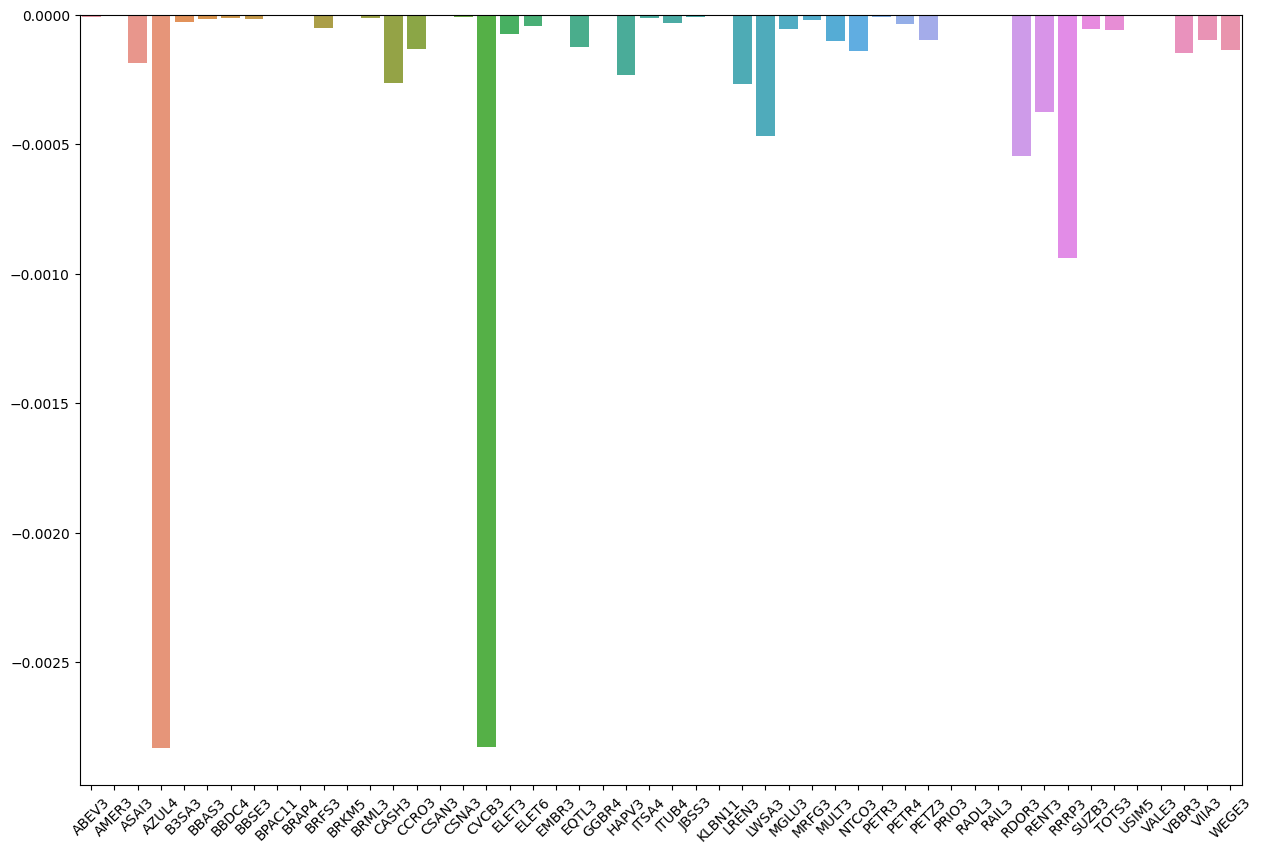

In [19]:
# Showing in a graph
plt.figure(figsize=(15, 10))
sns.barplot(x=delta.loc['diff'].index, y=delta.loc['diff'].values)
plt.xticks(rotation=45)
None

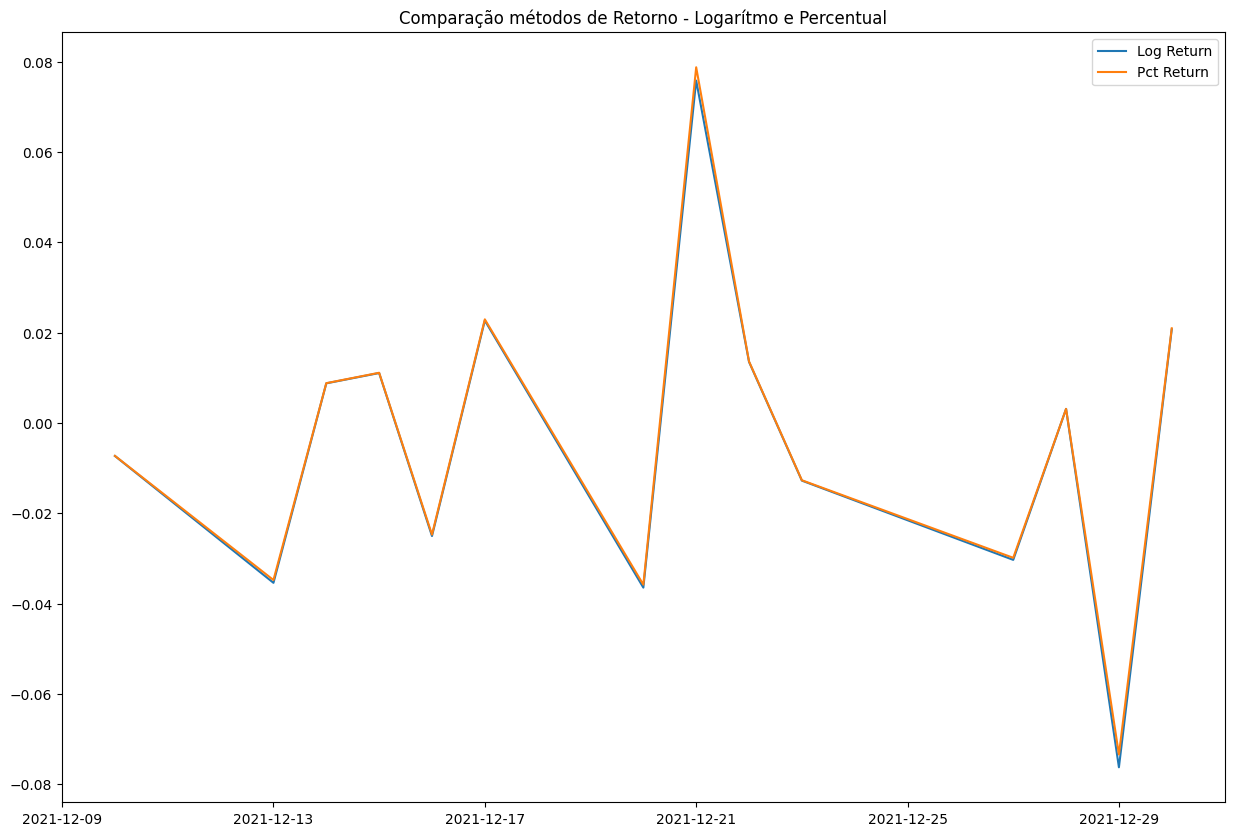

In [25]:
# Escolhendo uma ação e plotando o gráfico com retorno logarítmo e retorno percentual
plt.figure(figsize=(15, 10))
plt.plot(log_return['AZUL4'])
plt.plot(pct_return['AZUL4'])
plt.legend(['Log Return', 'Pct Return']) 
plt.title('Comparação métodos de Retorno - Logarítmo e Percentual')
None

# Q3. 
- Escolha 2 ações das 50 estudadas, que tenham sido negociadas desde pelo menos 01/11/2017, deixe claro quais você escolheu. Apresente graficamente o histórico de preços, de variação e a distribuição dos retornos diários delas. Cada ação deve ter seus gráficos apresentados como output de uma única célula.

## - 3.1 Choosing the stocks - The idea is to choose automaticaly the stocks with the most and least returns

- First I'll drop the holiday date and then drop the columns with na values, the ones that don't have data since 2017-11-01
- Second calculate the accumulated returns and filter the ones with the most and least returns

In [52]:
# Desde a primeira visualização de dados nulos deu pra perceber todas as ações vieram com ao menos um valor nulo
# Acabou vindo com a sexta feira Santa de 2021
prices[prices['WEGE3'].isna()]

,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Fazendo um cópia, retirando da data com problema e dropando as colunas com dados faltantes
prices_dropped = prices.copy()
prices_dropped.drop(index='2021-04-02', inplace=True) # dava pra pegar o index de forma automática tb
prices_dropped.dropna(axis=1, inplace=True) # Dropando colunas sem dados desde o início
prices_dropped

,ABEV3,AMER3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,BRFS3,...,PRIO3,RADL3,RAIL3,RENT3,SUZB3,TOTS3,USIM5,VALE3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-01,17.99,21.56,27.36,6.54,25.64,15.19,18.43,4.48,12.73,43.56,...,1.13,15.12,12.24,17.32,18.78,10.75,7.21,22.71,7.3138,7.58
2017-11-02,17.99,21.56,27.36,6.54,25.64,15.19,18.43,4.48,12.73,43.56,...,1.13,15.12,12.24,17.32,18.78,10.75,7.21,22.71,7.3138,7.58
2017-11-03,17.87,20.12,26.80,6.39,25.18,15.34,18.33,4.37,13.10,42.93,...,1.19,15.33,12.29,17.26,18.78,10.63,7.10,23.21,7.3636,7.68
2017-11-06,17.82,19.24,26.84,6.40,24.98,15.34,18.99,4.35,13.29,42.66,...,1.19,15.48,12.30,17.16,18.78,10.83,7.54,23.76,7.3138,7.78
2017-11-07,17.52,17.40,25.90,6.19,23.73,14.82,18.28,4.35,12.87,42.25,...,1.24,15.52,11.89,18.08,18.78,11.04,6.88,23.20,7.2043,7.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,15.55,30.12,26.46,10.99,27.71,17.13,19.15,21.02,22.72,22.62,...,19.70,23.89,17.65,53.84,58.59,28.50,14.10,72.46,4.5000,32.93
2021-12-27,15.53,31.27,25.67,10.93,27.77,17.32,19.27,21.04,23.32,22.23,...,20.66,23.86,17.78,54.13,58.74,28.57,14.27,72.28,4.8600,32.64
2021-12-28,15.52,30.42,25.75,10.78,27.61,17.26,19.31,20.30,23.18,22.59,...,20.05,23.50,17.51,52.66,58.08,28.09,13.99,70.54,4.9500,32.75


In [133]:
# Sobraram 41 ações com dados desde o início
# escolher automaticamente as duas ações com maior e pior retorno e que estão desde o começo do período

# Já dá para ver que PETRO RIO e CVC são respectivamente a melhor e pior ação baseado em retorno percentual acumulado
simple_return = (prices_dropped.pct_change() + 1).cumprod()
simple_return.iloc[-1].sort_values(ascending=False)

PRIO3     18.292035
JBSS3      5.907200
BPAC11     4.584821
WEGE3      4.281003
MRFG3      4.210191
CSNA3      3.847003
MGLU3      3.592040
VALE3      3.142668
SUZB3      3.116081
GGBR4      3.052071
RENT3      3.009238
TOTS3      2.654884
CSAN3      2.589776
PETR3      2.287568
PETR4      2.232667
USIM5      1.994452
EQTL3      1.993671
ELET3      1.986061
BRAP4      1.857031
ELET6      1.746556
B3SA3      1.645260
EMBR3      1.620104
RADL3      1.593254
KLBN11     1.547289
BRKM5      1.526286
RAIL3      1.449346
AMER3      1.435993
ITSA4      1.261765
BBDC4      1.125741
BBAS3      1.067083
BBSE3      1.045578
ITUB4      0.905245
AZUL4      0.890351
ABEV3      0.857143
MULT3      0.854486
LREN3      0.841939
CCRO3      0.746598
VIIA3      0.717821
BRML3      0.698816
BRFS3      0.516988
CVCB3      0.313698
Name: 2021-12-30 00:00:00, dtype: float64

In [136]:
# Maior Retorno de forma automática - transpondo e manipulando o df para ficar mais fácil
teste = simple_return.T.reset_index().rename(columns={'index': 'ticker'})

# Ação com maior retorno	
max_stock = teste[teste.iloc[:, -1] == teste.iloc[:, -1].max()]['ticker'].values[0]
max_stock

'PRIO3'

In [193]:
# Ou com outro método mais fácil dependendo da perspectiva
teste.nlargest(1, columns=teste.columns[-1])['ticker'].values[0]

'PRIO3'

In [139]:
# Ação com menor retorno
min_stock = teste[teste.iloc[:, -1] == teste.iloc[:, -1].min()]['ticker'].values[0]
min_stock

'CVCB3'

In [194]:
# Ou com outro método mais fácil dependendo da perspectiva
teste.nsmallest(1, columns=teste.columns[-1])['ticker'].values[0]

'CVCB3'

## - 3.2 Chosen Stocks:

- PRIO3
- CVCB3

### Graphically presenting the history, variation and distribution of the daily returns

Apresente graficamente o histórico de preços, de variação e a distribuição dos retornos diários delas. Cada ação deve ter seus gráficos apresentados como output de uma única célula.

In [143]:
prices_filled[[max_stock, min_stock]]


,PRIO3,CVCB3
Date,,
2017-11-01,1.13,42.78
2017-11-02,1.13,42.78
2017-11-03,1.19,41.80
2017-11-06,1.19,41.26
2017-11-07,1.24,40.68
...,...,...
2021-12-23,19.70,13.78
2021-12-27,20.66,13.75
2021-12-28,20.05,14.18


<AxesSubplot:title={'center':'Histotico de Preços'}, xlabel='Date'>

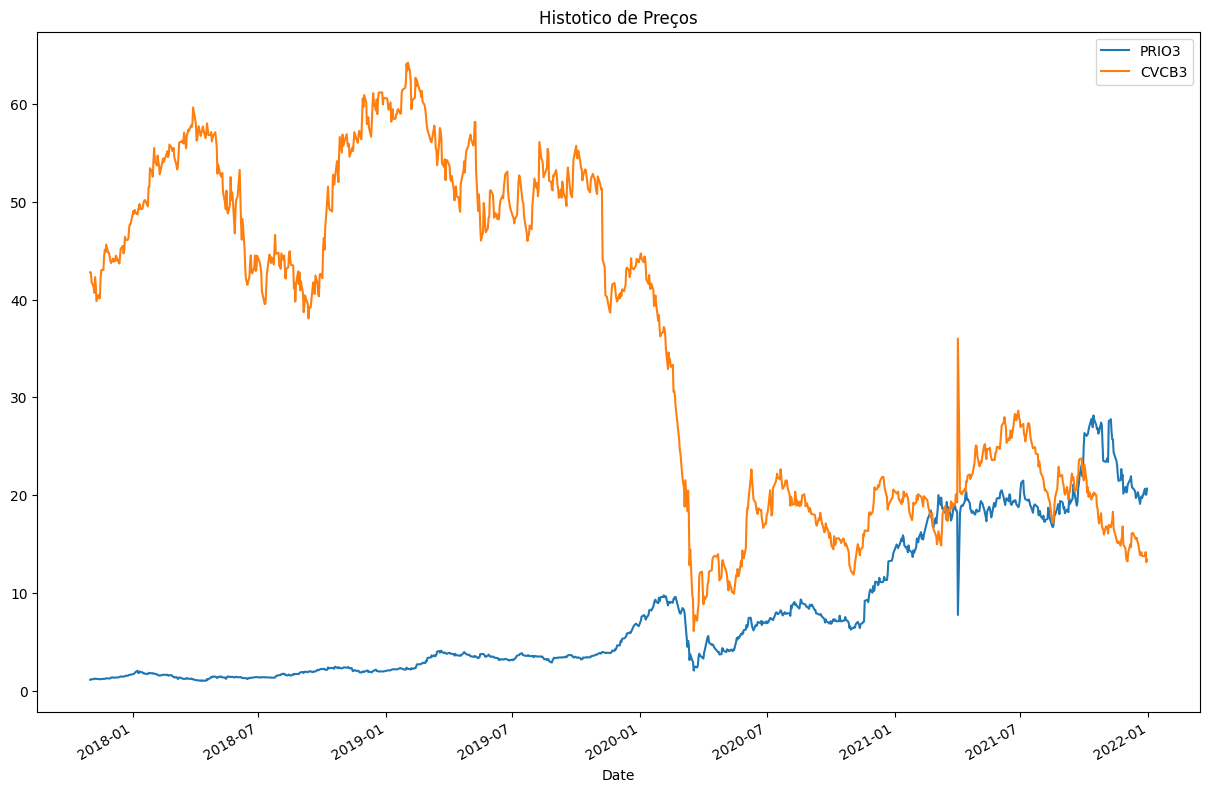

In [145]:
prices_filled[[max_stock, min_stock]].plot(figsize=(15, 10), title='Histotico de Preços')

<AxesSubplot:title={'center':'Variação de Preços'}, xlabel='Date'>

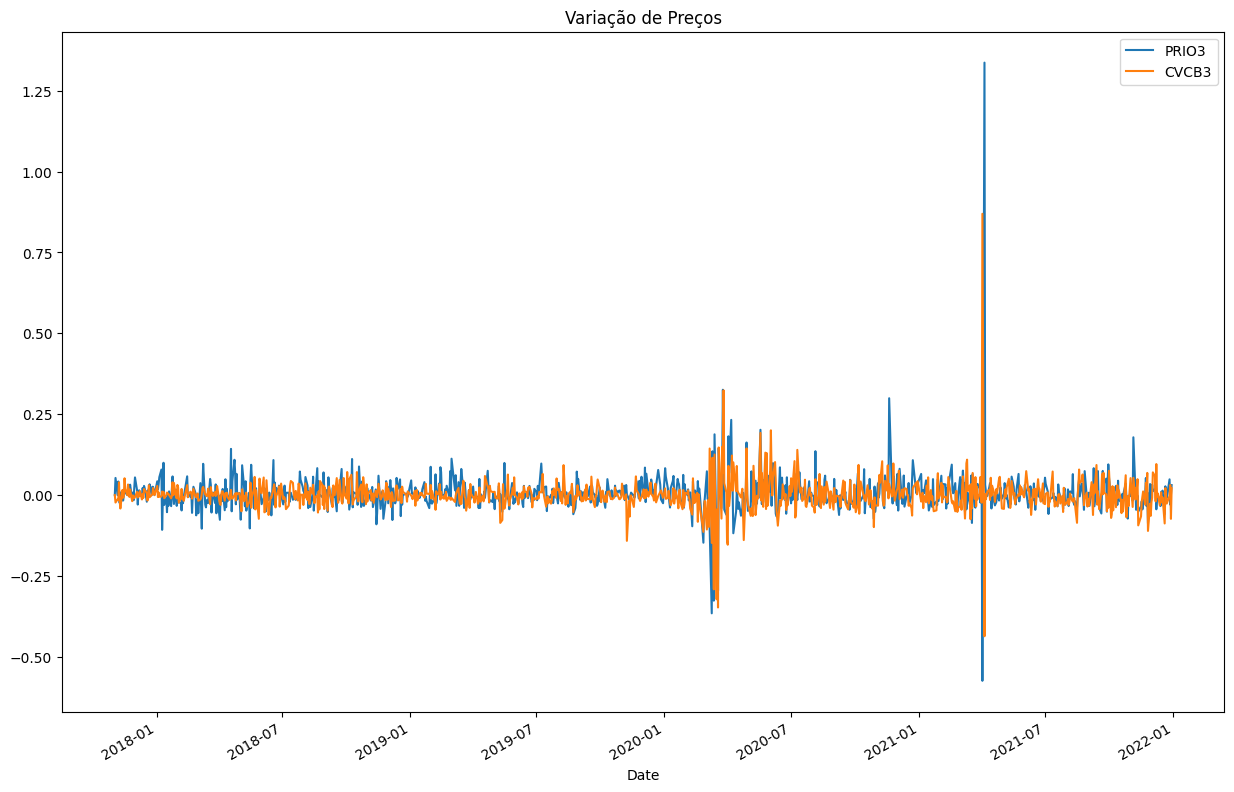

In [147]:
prices_filled[[max_stock, min_stock]].pct_change().plot(figsize=(15, 10), title='Variação de Preços')

<AxesSubplot:title={'center':'Variação Acumulada de Preços'}, xlabel='Date'>

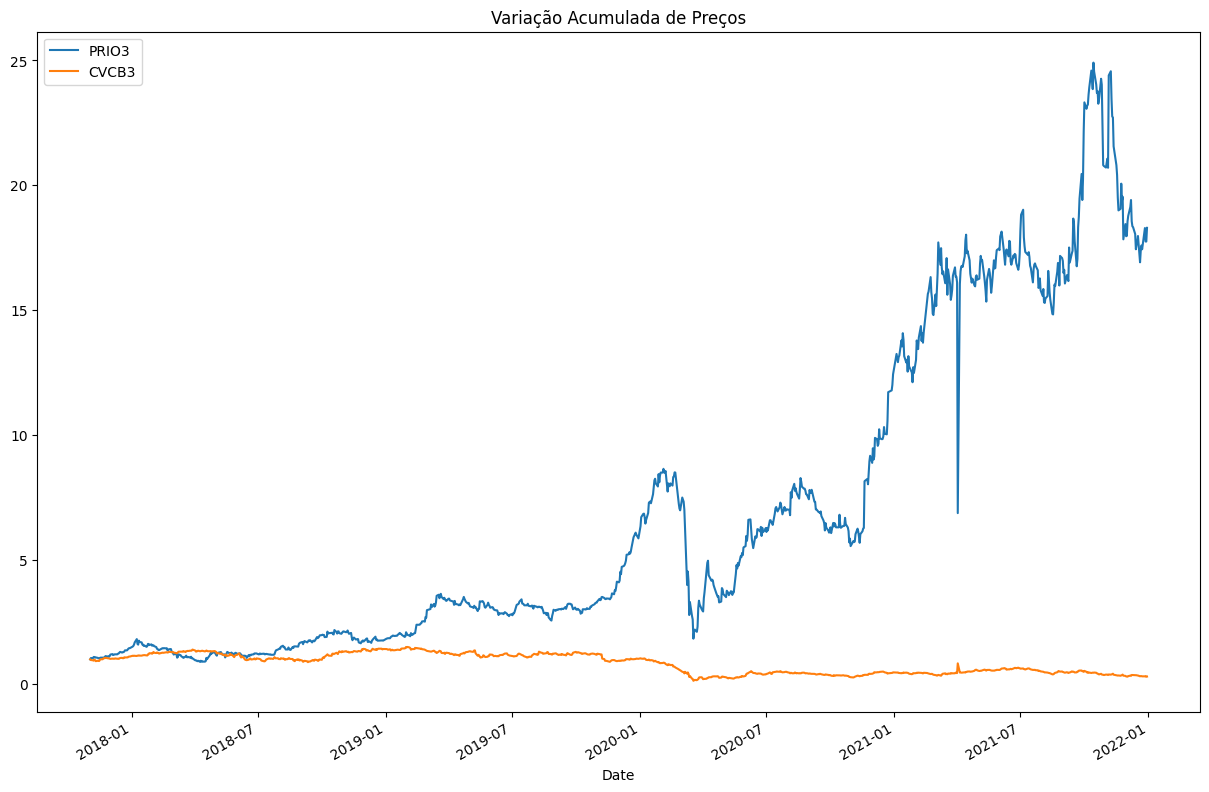

In [150]:
(prices_filled[[max_stock, min_stock]].pct_change() + 1).cumprod().plot(figsize=(15, 10), title='Variação Acumulada de Preços')

# Q4.
- Crie dataframes com os retornos mensais e trimestrais das 2 ações e a variação do IBOVESPA. A partir desses mostre a média, mediana, variancia, 1º e 3º quartil para o retorno trimestrais e mensais das ações.

## - 4.1 Getting Ibovespa data

In [173]:
# Dados Ibov
ibov = pd.DataFrame(yf.download('^BVSP', start='2017-11-01', end='2022-01-01', rounding=True)['Adj Close'])
ibov.rename(columns={'Adj Close': 'IBOV'}, inplace=True)
ibov

[*********************100%***********************]  1 of 1 completed


,IBOV
Date,
2017-11-01,73824.0
2017-11-03,73915.0
2017-11-06,74311.0
2017-11-07,72415.0
2017-11-08,74363.0
...,...
2021-12-23,104891.0
2021-12-27,105531.0
2021-12-28,104864.0


## - 4.2 Merging dfs

In [184]:
# Merging dataframes
merged = pd.merge(prices_filled[[max_stock, min_stock]], ibov, left_index=True, right_index=True)
merged

,PRIO3,CVCB3,IBOV
Date,,,
2017-11-01,1.13,42.78,73824.0
2017-11-03,1.19,41.80,73915.0
2017-11-06,1.19,41.26,74311.0
2017-11-07,1.24,40.68,72415.0
2017-11-08,1.24,42.29,74363.0
...,...,...,...
2021-12-23,19.70,13.78,104891.0
2021-12-27,20.66,13.75,105531.0
2021-12-28,20.05,14.18,104864.0


## - 4.3 Month Returns

In [187]:
#resample
month_returns = merged.pct_change().resample('M').mean()
month_returns

,PRIO3,CVCB3,IBOV
Date,,,
2017-11-30,0.007160,0.001799,-0.001304
2017-12-31,0.012631,0.004139,0.003029
2018-01-31,0.004737,0.006234,0.005108
2018-02-28,-0.010620,0.001110,0.000478
2018-03-31,-0.008814,0.003792,-0.000029
2018-04-30,0.011197,-0.001986,0.000468
2018-05-31,0.000568,-0.005566,-0.005333
2018-06-30,-0.000446,-0.005141,-0.002429
2018-07-31,0.006644,-0.000851,0.004105


In [181]:
# Estatística descritiva com todos os valores pedidos
month_returns.describe()

,PRIO3,CVCB3,IBOV
count,50.000000,50.000000,50.000000
mean,0.003925,-0.000263,0.000505
std,0.009491,0.008416,0.003412
min,-0.023785,-0.022824,-0.013145
25%,-0.001223,-0.004966,-0.001249
50%,0.003788,0.000628,0.000441
75%,0.009870,0.004554,0.002833
max,0.027340,0.021877,0.007902


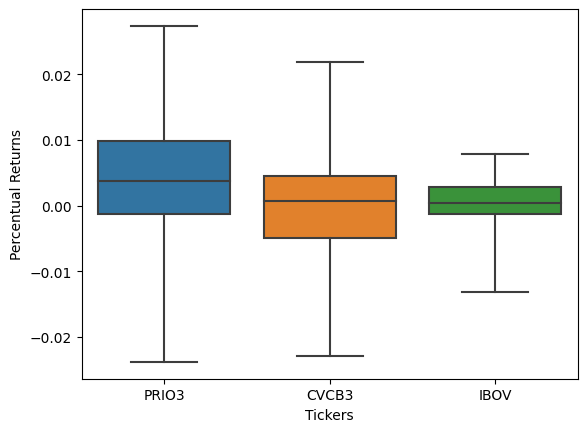

In [203]:
# Boxplot
# Boxplot
sns.boxplot(data=month_returns, whis=10)

# Plot the y-axis on a log scale
#plt.yscale('log')

# Remove unneeded lines and label axes
#sns.despine(left=True, bottom=True)
plt.xlabel('Tickers')
plt.ylabel('Percentual Returns')
plt.show()

## - 4.4 Quarter Returns

In [179]:
quarter_returns = merged.pct_change().resample('Q').mean()
quarter_returns

,PRIO3,CVCB3,IBOV
Date,,,
2017-12-31,0.010040,0.003031,0.000976
2018-03-31,-0.004613,0.003842,0.001921
2018-06-30,0.003773,-0.004231,-0.002431
2018-09-30,0.007803,-0.000301,0.001458
2018-12-31,-0.001251,0.006314,0.001864
2019-03-31,0.011394,-0.001676,0.001467
2019-06-30,-0.002591,-0.001165,0.000974
2019-09-30,0.001866,0.002076,0.000623
2019-12-31,0.010869,-0.003493,0.001712


In [204]:
#Estatística descritiva com todos os valores pedidos
quarter_returns.describe()

,PRIO3,CVCB3,IBOV
count,17.000000,17.000000,17.000000
mean,0.004032,-0.000111,0.000538
std,0.006323,0.006254,0.002510
min,-0.005041,-0.017294,-0.006301
25%,-0.001251,-0.003344,-0.000255
50%,0.003773,-0.000184,0.000976
75%,0.010040,0.003842,0.001712
max,0.014448,0.010486,0.004583


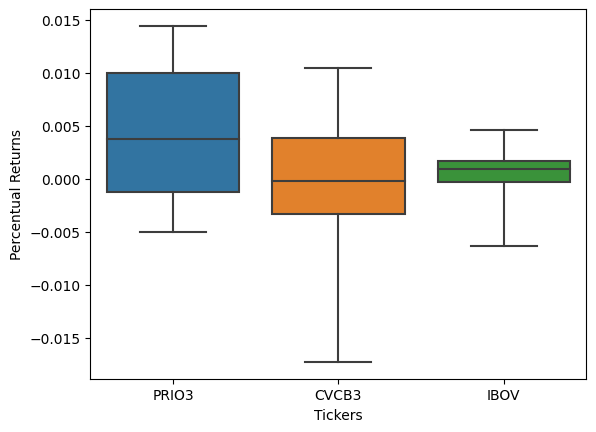

In [202]:
# Boxplot
sns.boxplot(data=quarter_returns, whis=10)

# Plot the y-axis on a log scale
#plt.yscale('log')

# Remove unneeded lines and label axes
#sns.despine(left=True, bottom=True)
plt.xlabel('Tickers')
plt.ylabel('Percentual Returns')
plt.show()

# Q5.
- Utilizando os dados dessas mesmas 2 ações implemente uma estratégia de trade para cada uma delas usando Índice de Força Relativa, com janela de 21 dias úteis e pontos de entrada de 75 e 25. Mostre o resultado das estratégias para o período de 01/01/2018 a 31/12/2021.

In [ ]:
#rsi


# Q6.
- Apresente  as  métricas e  gráficos  que  achar  relevantes  sobre  as  estratégias  da  Q5,  comparando  as duas ações e avaliando cada estratégia em comparação ao desempenho do IBOVESPA.

Bonus. Comente e, se possível, implementecomo seria possível melhorar as estratégias testadas.Lembre-se,avaliaremos também a clareza e compreensibilidadedo código, utilize comentários a vontade para facilitar o entendimento. Para poder avaliar o código precisamos ser capazes de executá-lo, garantaque todas as dependências são facilmente encontradas e disponíveis.